# NYSE FANG+ index 週足 メディアン統計

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

code = 'NYFANG'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='3y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-14 00:00:00-04:00,5663.520020,6472.339844,5397.959961,6434.229980,0,0.0,0.0
2022-03-21 00:00:00-04:00,6434.229980,6720.390137,6278.669922,6650.040039,0,0.0,0.0
2022-03-28 00:00:00-04:00,6650.040039,6922.799805,6594.319824,6645.149902,0,0.0,0.0
2022-04-04 00:00:00-04:00,6645.149902,6924.290039,6289.720215,6300.120117,0,0.0,0.0
2022-04-11 00:00:00-04:00,6300.120117,6300.120117,5991.970215,5997.290039,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,13606.740234,14053.740234,13596.299805,14029.120117,0,0.0,0.0
2025-02-17 00:00:00-05:00,14029.120117,14047.469727,13336.669922,13366.769531,0,0.0,0.0
2025-02-24 00:00:00-05:00,13366.769531,13456.679688,12496.990234,12871.910156,0,0.0,0.0


In [3]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-16 00:00:00-04:00,2846.209961,2846.219971,2455.649902,2656.110107,0,0.0,0.0
2020-03-23 00:00:00-04:00,2667.580078,3008.929932,2593.800049,2901.250000,0,0.0,0.0
2020-03-30 00:00:00-04:00,2924.370117,3066.959961,2792.659912,2829.550049,0,0.0,0.0
2020-04-06 00:00:00-04:00,2925.120117,3147.510010,2917.790039,3107.439941,0,0.0,0.0
2020-04-13 00:00:00-04:00,3112.439941,3500.020020,3098.870117,3452.090088,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,13606.740234,14053.740234,13596.299805,14029.120117,0,0.0,0.0
2025-02-17 00:00:00-05:00,14029.120117,14047.469727,13336.669922,13366.769531,0,0.0,0.0
2025-02-24 00:00:00-05:00,13366.769531,13456.679688,12496.990234,12871.910156,0,0.0,0.0


## Moving Median

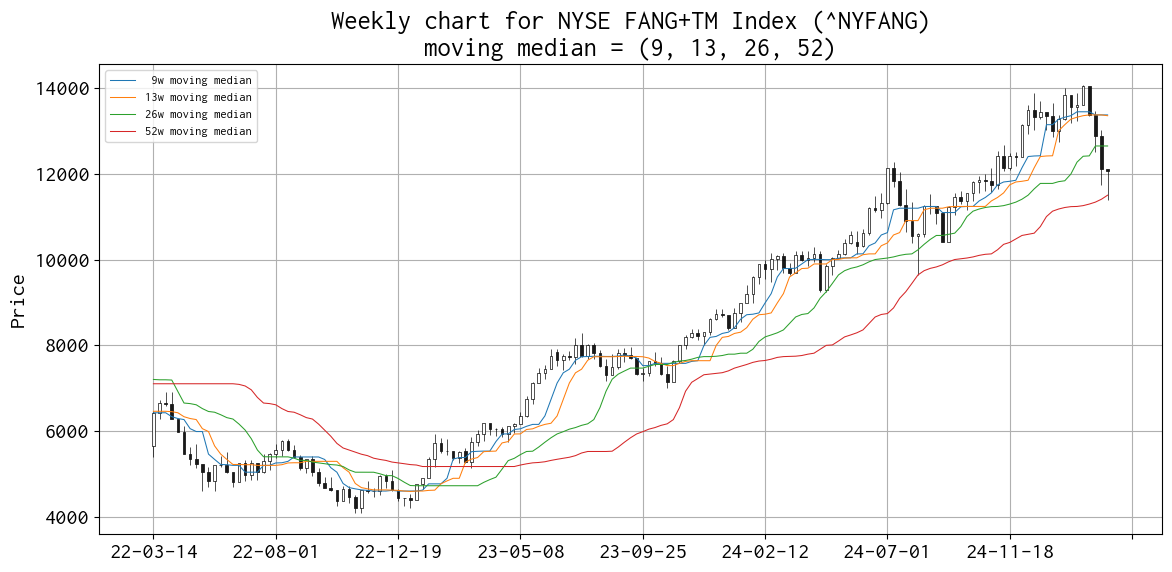

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

"""
fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()
"""

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()

apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label=' 9w moving median', ax=ax),
    mpf.make_addplot(mm13[df.index], width=0.75, label='13w moving median', ax=ax),
    mpf.make_addplot(mm26[df.index], width=0.75, label='26w moving median', ax=ax),
    mpf.make_addplot(mm52[df.index], width=0.75, label='52w moving median', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s (%s)\nmoving median = (9, 13, 26, 52)' %(ticker.info['longName'], symbol))
ax.grid()
ax.legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('report_weekly_chart_median_%s.png' % code)
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-03 00:00:00-05:00,12871.910156,13010.110352,11743.639648,12109.650391,0,0.0,0.0
2025-03-10 00:00:00-04:00,12109.650391,12109.650391,11388.019531,12057.167969,0,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-03-03 00:00:00-05:00    12109.650391
2025-03-10 00:00:00-04:00    12057.167969
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-03-03 00:00:00-05:00          NaN
2025-03-10 00:00:00-04:00   -52.482422
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-10 00:00:00-04:00   -52.482422
dtype: float64

In [9]:
df['Close'].rolling(9).median().tail()

Date
2025-02-10 00:00:00-05:00    13440.049805
2025-02-17 00:00:00-05:00    13440.049805
2025-02-24 00:00:00-05:00    13366.769531
2025-03-03 00:00:00-05:00    13366.769531
2025-03-10 00:00:00-04:00    13366.769531
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(13).median().tail()

Date
2025-02-10 00:00:00-05:00    13348.889648
2025-02-17 00:00:00-05:00    13366.769531
2025-02-24 00:00:00-05:00    13366.769531
2025-03-03 00:00:00-05:00    13366.769531
2025-03-10 00:00:00-04:00    13348.889648
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(26).median().tail()

Date
2025-02-10 00:00:00-05:00    12404.689941
2025-02-17 00:00:00-05:00    12413.614746
2025-02-24 00:00:00-05:00    12643.984863
2025-03-03 00:00:00-05:00    12643.984863
2025-03-10 00:00:00-04:00    12643.984863
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(52).median().tail()

Date
2025-02-10 00:00:00-05:00    11255.330078
2025-02-17 00:00:00-05:00    11291.589844
2025-02-24 00:00:00-05:00    11337.125000
2025-03-03 00:00:00-05:00    11405.005371
2025-03-10 00:00:00-04:00    11498.479980
Name: Close, dtype: float64

## Robust Bollinger's bands

In [13]:
period = 26
calc_robust_bollinger(df0, period)
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2020-03-16 00:00:00-04:00,2846.209961,2846.219971,2455.649902,2656.110107,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-23 00:00:00-04:00,2667.580078,3008.929932,2593.800049,2901.250000,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-30 00:00:00-04:00,2924.370117,3066.959961,2792.659912,2829.550049,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-04-06 00:00:00-04:00,2925.120117,3147.510010,2917.790039,3107.439941,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-04-13 00:00:00-04:00,3112.439941,3500.020020,3098.870117,3452.090088,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,13606.740234,14053.740234,13596.299805,14029.120117,0,0.0,0.0,12267.609863,11471.775146,13302.194824,8726.145630,16047.824341
2025-02-17 00:00:00-05:00,14029.120117,14047.469727,13336.669922,13366.769531,0,0.0,0.0,12404.689941,11598.737305,13340.024658,8986.806274,15951.955688
2025-02-24 00:00:00-05:00,13366.769531,13456.679688,12496.990234,12871.910156,0,0.0,0.0,12413.614746,11755.947754,13362.299561,9346.420044,15771.827271


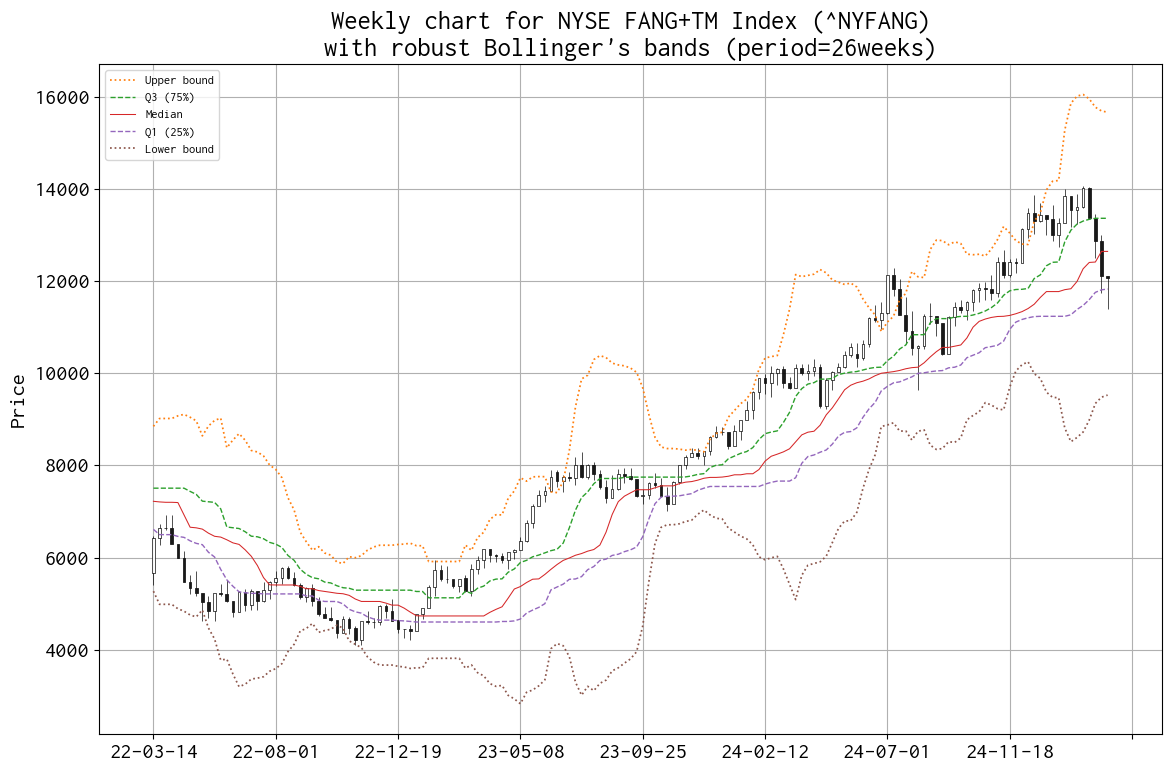

In [14]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger\'s bands (period=%dweeks)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger\'s bands (period=%sweeks)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

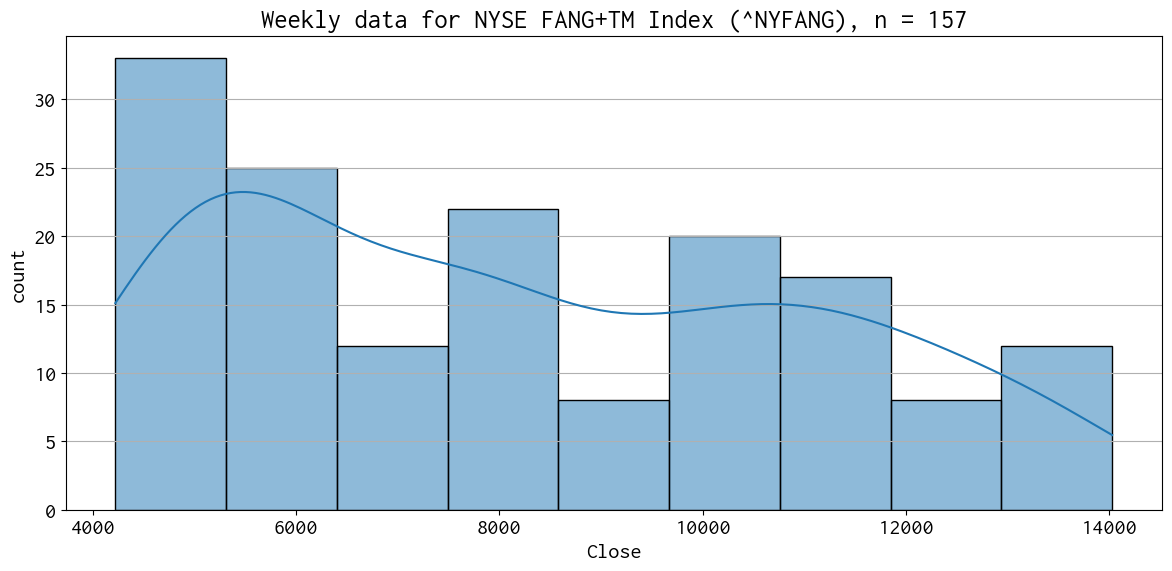

In [15]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('report_weekly_histogram_%s.png' % code)
plt.show()